# Excelerate DVA Week 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
user_data = pd.read_csv('UserData (2).csv')
oppo_info = pd.read_csv('Opportunity Wise Data.csv')

## User Data

### Initial Data Cleaning

In [7]:
user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
2,"[""GlobalShala"",""Illinois Institute of Technolo...",NaN,India,NaN,2022-10-14T17:13:36.303Z,NaN,NaN,False
3,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",NaN,Albania,NaN,2023-06-06T12:29:01.772Z,NaN,NaN,True
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False


In [11]:
print(user_data.shape)
print(oppo_info.shape)

(27562, 8)
(20322, 21)


In [13]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreferredSponsors  27562 non-null  object
 1   Gender             18027 non-null  object
 2   Country            27500 non-null  object
 3   Degree             16750 non-null  object
 4   Sign Up Date       27562 non-null  object
 5   city               18029 non-null  object
 6   zip                18028 non-null  object
 7   isFromSocialMedia  27553 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [15]:
user_data['Gender'] = user_data['Gender'].astype('category')
user_data['isFromSocialMedia'] = user_data['isFromSocialMedia'].astype('bool')
user_data['Country'] = user_data['Country'].astype('string')
user_data['city'] = user_data['city'].astype('string')
user_data['Degree'] = user_data['Degree'].astype('string')

In [17]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27562 entries, 0 to 27561
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PreferredSponsors  27562 non-null  object  
 1   Gender             18027 non-null  category
 2   Country            27500 non-null  string  
 3   Degree             16750 non-null  string  
 4   Sign Up Date       27562 non-null  object  
 5   city               18029 non-null  string  
 6   zip                18028 non-null  object  
 7   isFromSocialMedia  27562 non-null  bool    
dtypes: bool(1), category(1), object(3), string(3)
memory usage: 1.3+ MB


In [19]:
user_data.isnull().sum()

PreferredSponsors        0
Gender                9535
Country                 62
Degree               10812
Sign Up Date             0
city                  9533
zip                   9534
isFromSocialMedia        0
dtype: int64

In [21]:
user_data.dropna(inplace=True)

In [23]:
user_data.isnull().sum()

PreferredSponsors    0
Gender               0
Country              0
Degree               0
Sign Up Date         0
city                 0
zip                  0
isFromSocialMedia    0
dtype: int64

In [27]:
user_data.shape

(16627, 8)

In [ ]:
# Total of 10,935 rows have been dropped which is a bit too much in my opinion.

In [29]:
user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia
0,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False
1,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False
4,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False
8,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,Nigeria,Undergraduate Student,2023-07-27T18:02:17.535Z,Lagos,100278,True
9,"[""GlobalShala"",""Grant Thornton China"",""Saint L...",Male,India,High School Student,2023-05-05T04:47:25.446Z,RAS,388570,True


In [31]:
user_data["Gender"].value_counts()


Male                     10185
Female                    6359
Don't want to specify       69
Other                       14
Name: Gender, dtype: int64

In [33]:
user_data["Degree"].value_counts()

Undergraduate Student       6480
Graduate Program Student    5986
Not in Education            2632
High School Student         1529
Name: Degree, dtype: Int64

In [35]:
user_data["isFromSocialMedia"].value_counts()

False    8980
True     7647
Name: isFromSocialMedia, dtype: int64

In [37]:
user_data.columns

Index(['PreferredSponsors', 'Gender', 'Country', 'Degree', 'Sign Up Date',
       'city', 'zip', 'isFromSocialMedia'],
      dtype='object')

### Data Validation

#### Sponsors

In [ ]:
# PreferredSponsors has data that needs to be divided into more columns
# Each sponser will get a new column

In [41]:
# Remove extra characters and split into lists
user_data['PreferredSponsors'] = user_data['PreferredSponsors'].str.strip('[]"').str.split('","')

In [43]:
# Flatten the list of sponsors to identify all unique sponsors
all_sponsors = sorted(set(sponsor for sublist in user_data['PreferredSponsors'] for sponsor in sublist))

In [45]:
# Create new columns for each sponsor
for sponsor in all_sponsors:
    user_data[sponsor] = user_data['PreferredSponsors'].apply(lambda x: 1 if sponsor in x else 0)

In [47]:
user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
0,"[GlobalShala, Grant Thornton China, Saint Loui...",Male,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,False,1,1,1,1,1
1,"[GlobalShala, Grant Thornton China, Saint Loui...",Male,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,False,1,1,1,1,1
4,"[GlobalShala, Grant Thornton China, Saint Loui...",Female,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,False,1,1,1,1,1
8,"[GlobalShala, Grant Thornton China, Saint Loui...",Male,Nigeria,Undergraduate Student,2023-07-27T18:02:17.535Z,Lagos,100278,True,1,1,1,1,1
9,"[GlobalShala, Grant Thornton China, Saint Loui...",Male,India,High School Student,2023-05-05T04:47:25.446Z,RAS,388570,True,1,1,1,1,1


#### Gender and Social Media

In [52]:
# Numerize Gender and isFromSocialMedia
user_data['Gender'] = user_data['Gender'].map({'Male': 0, 'Female': 1})
user_data['isFromSocialMedia'] = user_data['isFromSocialMedia'].astype(int)

user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
0,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,Nigeria,Undergraduate Student,2023-07-23T08:05:58.602Z,Owerri,460103,0,1,1,1,1,1
1,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,India,Undergraduate Student,2023-04-24T09:57:07.405Z,kottayam,686501,0,1,1,1,1,1
4,"[GlobalShala, Grant Thornton China, Saint Loui...",1.0,Ghana,Not in Education,2023-06-15T16:31:42.719Z,Kumasi,AT-1214-9090,0,1,1,1,1,1
8,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,Nigeria,Undergraduate Student,2023-07-27T18:02:17.535Z,Lagos,100278,1,1,1,1,1,1
9,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,India,High School Student,2023-05-05T04:47:25.446Z,RAS,388570,1,1,1,1,1,1


#### SignUp Date

In [57]:
# Convert to datetime format and standardize to 'YYYY-MM-DD HH:MM:SS'
user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date']).dt.strftime('%Y-%m-%d %H:%M:%S')
user_data.dtypes

PreferredSponsors                    object
Gender                              float64
Country                              string
Degree                               string
Sign Up Date                         object
city                                 string
zip                                  object
isFromSocialMedia                     int32
Excelerate                            int64
GlobalShala                           int64
Grant Thornton China                  int64
Illinois Institute of Technology      int64
Saint Louis University                int64
dtype: object

In [59]:
# Convert to datetime format and remove milliseconds
user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date']).dt.floor('s')

In [63]:
user_data['Sign Up Date'].dtypes

dtype('<M8[ns]')

In [65]:
user_data.head()

,PreferredSponsors,Gender,Country,Degree,Sign Up Date,city,zip,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
0,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,Nigeria,Undergraduate Student,2023-07-23 08:05:58,Owerri,460103,0,1,1,1,1,1
1,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,India,Undergraduate Student,2023-04-24 09:57:07,kottayam,686501,0,1,1,1,1,1
4,"[GlobalShala, Grant Thornton China, Saint Loui...",1.0,Ghana,Not in Education,2023-06-15 16:31:42,Kumasi,AT-1214-9090,0,1,1,1,1,1
8,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,Nigeria,Undergraduate Student,2023-07-27 18:02:17,Lagos,100278,1,1,1,1,1,1
9,"[GlobalShala, Grant Thornton China, Saint Loui...",0.0,India,High School Student,2023-05-05 04:47:25,RAS,388570,1,1,1,1,1,1


### Data Visualization

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


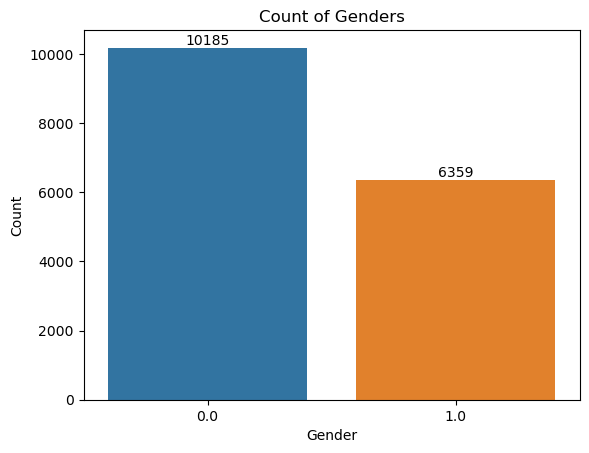

In [71]:
sorted_gender = user_data['Gender'].value_counts().index
user_data['Gender'] = pd.Categorical(user_data['Gender'], categories=sorted_gender, ordered=True)


ax = sns.countplot(x='Gender', data=user_data, order=sorted_gender)
for bars in ax.containers:
    ax.bar_label(bars)


plt.title('Count of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Gender', ylabel='isFromSocialMedia'>

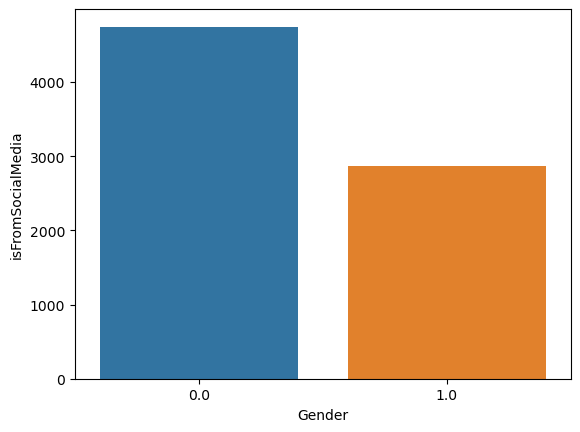

In [73]:
socialmedia_gen = user_data.groupby(['Gender'], as_index=False)['isFromSocialMedia'].sum().sort_values(by='isFromSocialMedia',ascending=False)
sns.barplot(x='Gender', y='isFromSocialMedia', data = socialmedia_gen , order=sorted_gender)

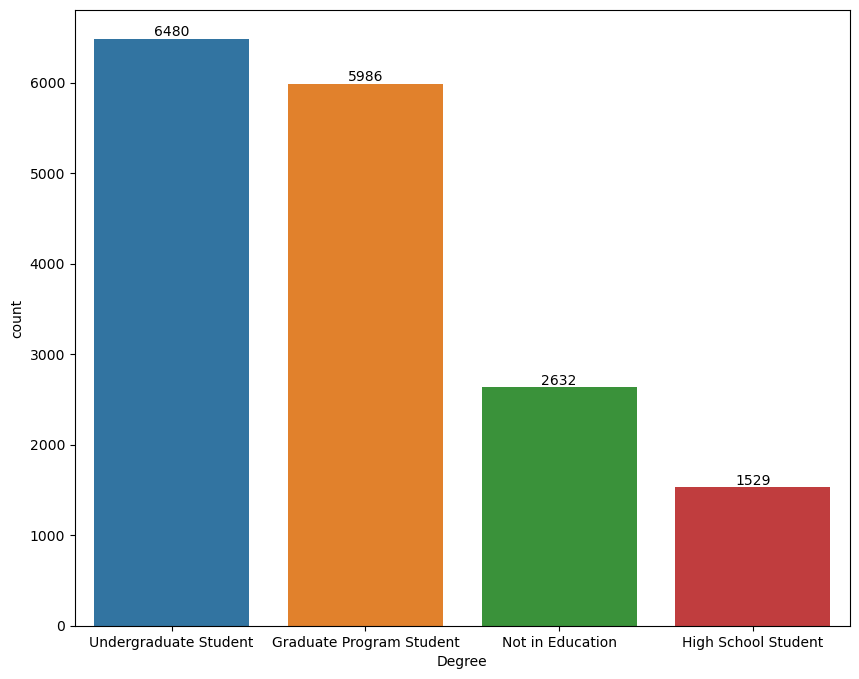

In [75]:
plt.figure(figsize=(10,8))
sorted_degree = user_data['Degree'].value_counts().index
ax = sns.countplot(x='Degree',data = user_data ,order=sorted_degree)

for bars in ax.containers:
    ax.bar_label(bars)

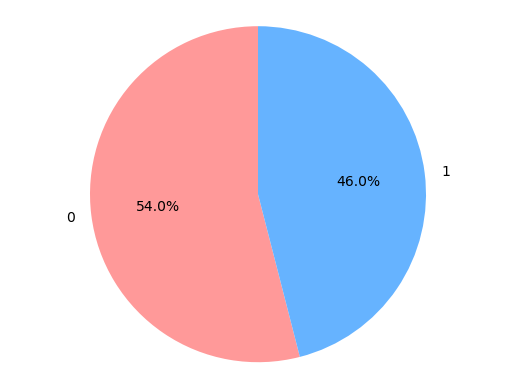

In [77]:
Social_counts = user_data['isFromSocialMedia'].value_counts()
plt.pie(Social_counts, labels=Social_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.show()

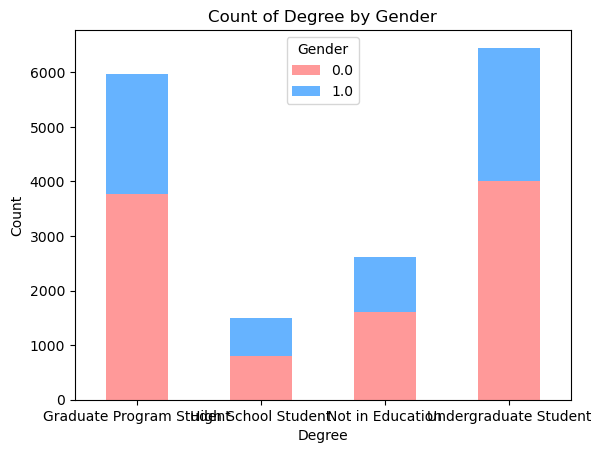

In [79]:
degree_gender_counts = pd.crosstab(user_data['Degree'], user_data['Gender'])
degree_gender_counts.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Count of Degree by Gender')
plt.ylabel('Count')
plt.xlabel('Degree')
plt.xticks(rotation=0)
plt.show()

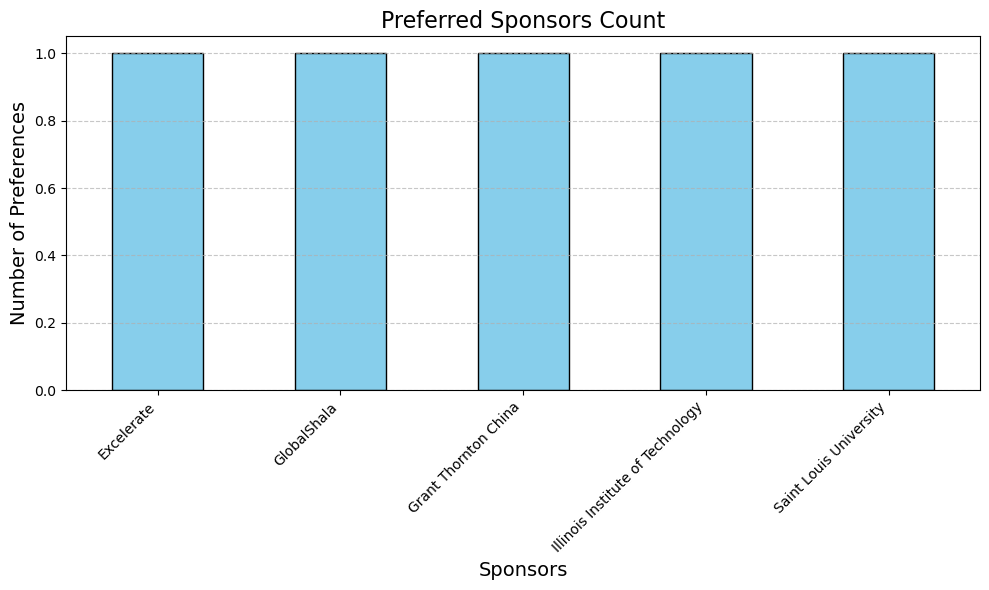

In [83]:
# Count occurrences of each sponsor
sponsor_counts = pd.Series(all_sponsors).value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
sponsor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Preferred Sponsors Count', fontsize=16)
plt.xlabel('Sponsors', fontsize=14)
plt.ylabel('Number of Preferences', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

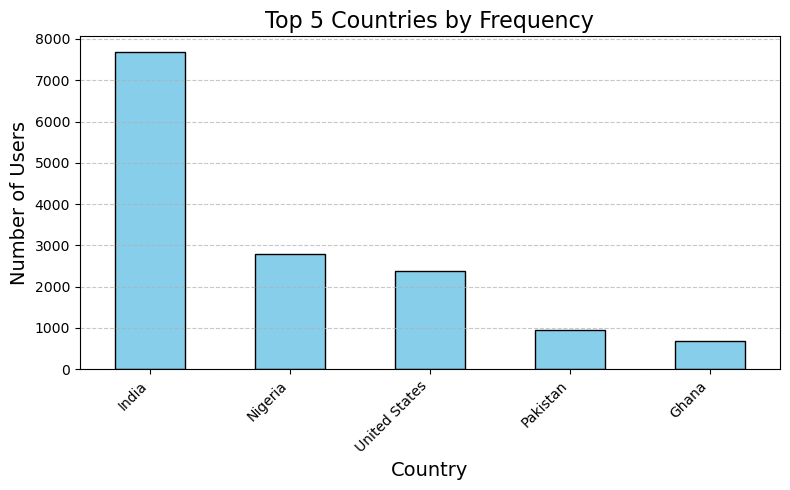

In [85]:
# Count occurrences of each country
country_counts = user_data['Country'].value_counts()

# Select the top 5 countries
top_countries = country_counts.head(5)

# Plot the data
plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Countries by Frequency', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

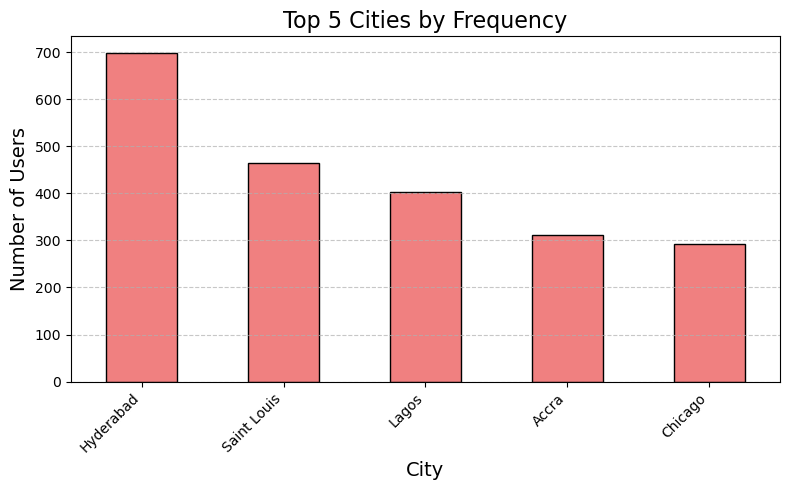

In [87]:
# Count occurrences of each city
city_counts = user_data['city'].value_counts()

# Select the top 5 cities
top_cities = city_counts.head(5)

# Plot the data
plt.figure(figsize=(8, 5))
top_cities.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 5 Cities by Frequency', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

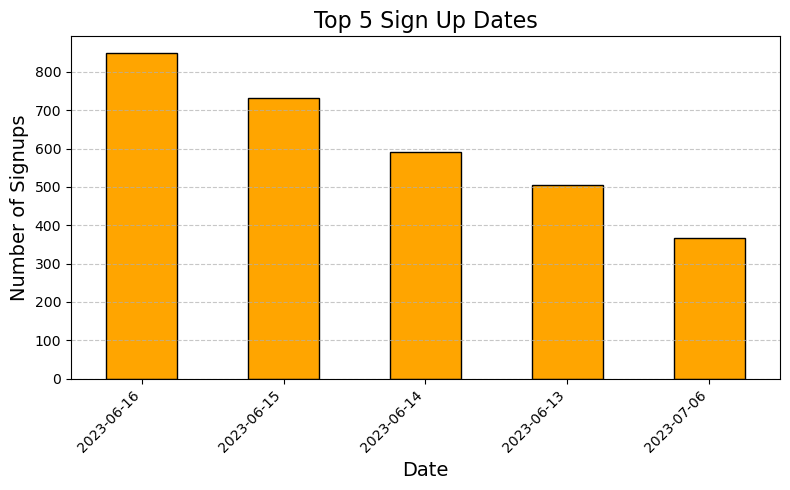

In [89]:
# Convert 'Sign Up Date' to datetime and extract the date part
user_data['Sign Up Date'] = pd.to_datetime(user_data['Sign Up Date'])
user_data['Sign Up Date'] = user_data['Sign Up Date'].dt.date

# Count occurrences of each date
date_counts = user_data['Sign Up Date'].value_counts()

# Select the top 5 signup dates
top_dates = date_counts.head(5)

# Plot the data
plt.figure(figsize=(8, 5))
top_dates.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 Sign Up Dates', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

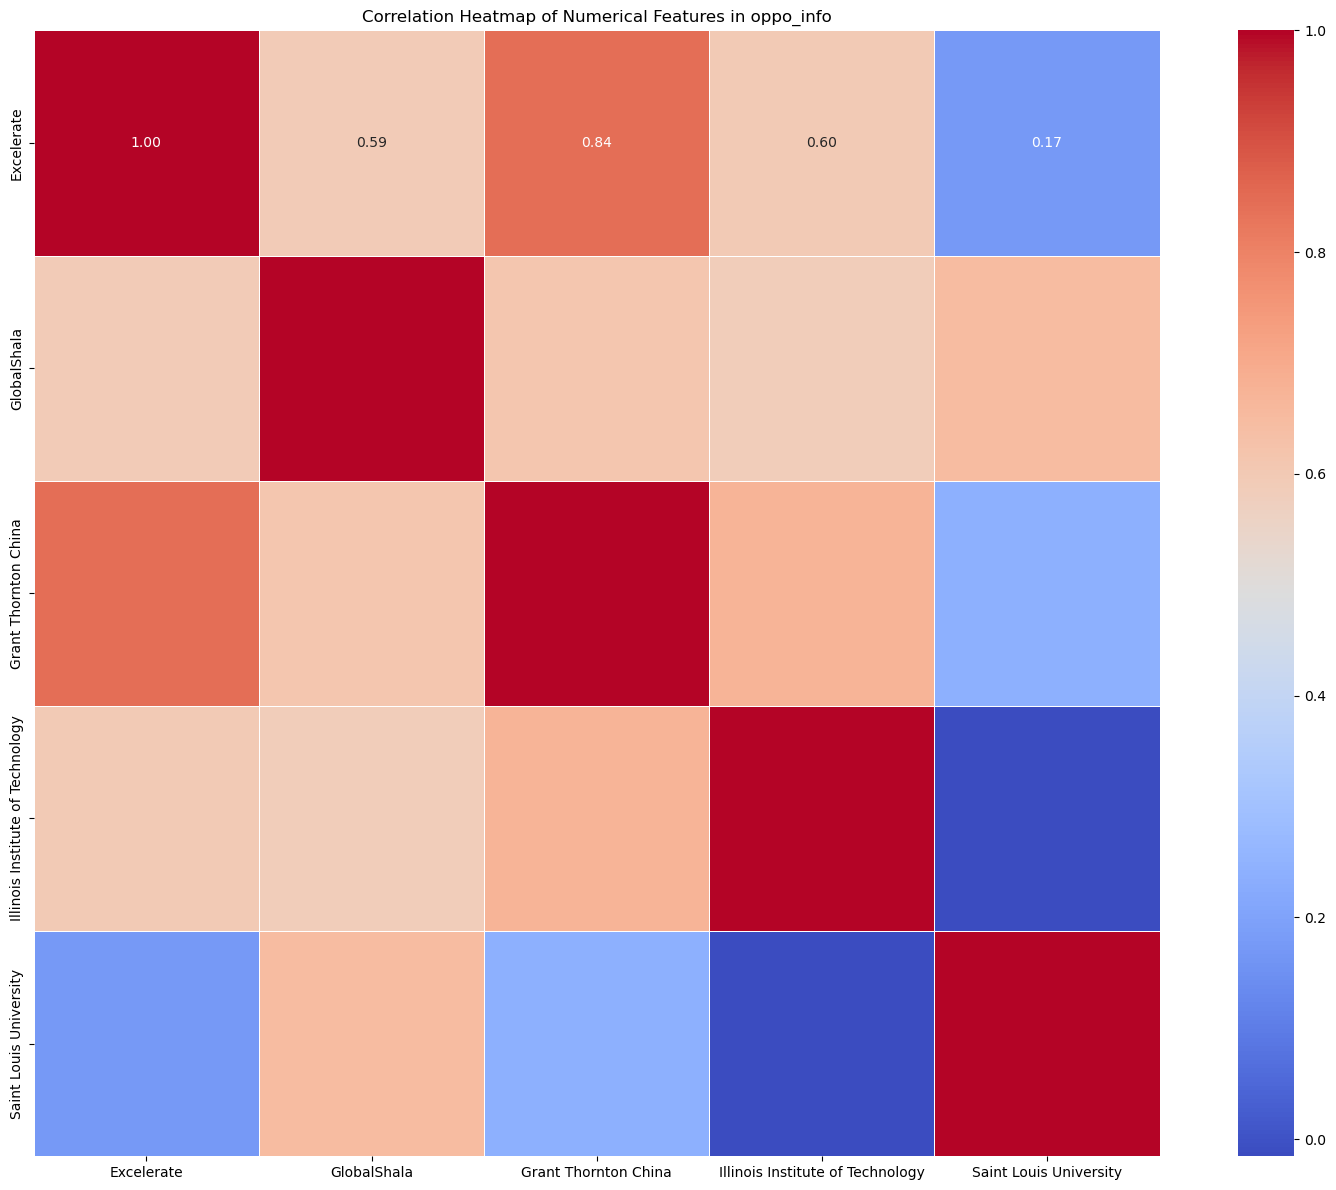

In [184]:
# Select only numerical columns from the DataFrame
numerical_df = user_data.select_dtypes(include=['float64', 'int64']).dropna(how='any')  # Selecting only numerical columns

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numerical Features in oppo_info")
plt.tight_layout()
plt.show()

In [188]:
user_data.describe()

,isFromSocialMedia,Excelerate,GlobalShala,Grant Thornton China,Illinois Institute of Technology,Saint Louis University
count,16627.000000,16627.000000,16627.000000,16627.000000,16627.000000,16627.000000
mean,0.459915,0.960666,0.900583,0.946352,0.947074,0.937752
std,0.498406,0.194393,0.299230,0.225328,0.223892,0.241613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
user_data.columns

Index(['PreferredSponsors', 'Gender', 'Country', 'Degree', 'Sign Up Date',
       'city', 'zip', 'isFromSocialMedia', 'Excelerate', 'GlobalShala',
       'Grant Thornton China', 'Illinois Institute of Technology',
       'Saint Louis University'],
      dtype='object')

In [95]:
# Save entire DataFrame to CSV
user_data.to_csv('user_data.csv', index=False)

# Print confirmation
print("Entire user_data DataFrame has been saved to 'user_data.csv'")

Entire user_data DataFrame has been saved to 'user_data.csv'


## Opportunity Wise Data

### Initial Data Cleaning

In [98]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Female,Amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37","Jan 05, 2023, 18:52:39",200.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Female,Satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 08:10:07","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",Male,Bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17","Jan 05, 2023, 18:52:39",NaN,NaN,NaN,NaN,NaN


In [103]:
oppo_info.dtypes

Profile Id                   object
Opportunity Id               object
Opportunity Name             object
Opportunity Category         object
Opportunity End Date         object
Gender                       object
City                         object
State                        object
Country                      object
Zip Code                     object
Graduation Date(YYYY MM)     object
Current Student Status       object
Current/Intended Major       object
Status Description           object
Apply Date                   object
Opportunity Start Date       object
Reward Amount               float64
Badge Id                     object
Badge Name                   object
Skill Points Earned         float64
Skills Earned                object
dtype: object

In [105]:
# Convert data types accordingly
oppo_info["Opportunity End Date"] = pd.to_datetime(oppo_info["Opportunity End Date"], errors='coerce')
oppo_info["Apply Date"] = pd.to_datetime(oppo_info["Apply Date"], errors='coerce')
oppo_info["Opportunity Start Date"] = pd.to_datetime(oppo_info["Opportunity Start Date"], errors='coerce')
oppo_info["Reward Amount"] = pd.to_numeric(oppo_info["Reward Amount"], errors='coerce')
oppo_info["Skill Points Earned"] = pd.to_numeric(oppo_info["Skill Points Earned"], errors='coerce')

# Ensure other columns are treated as strings when needed
columns_to_str = [
    "Profile Id", "Opportunity Id", "Opportunity Name", "Opportunity Category",
    "Gender", "City", "State", "Country", "Zip Code", 
    "Graduation Date(YYYY MM)", "Current Student Status", "Current/Intended Major",
    "Status Description", "Badge Id", "Badge Name", "Skills Earned"
]
oppo_info[columns_to_str] = oppo_info[columns_to_str].astype(str)

In [107]:
oppo_info.dtypes

Profile Id                          object
Opportunity Id                      object
Opportunity Name                    object
Opportunity Category                object
Opportunity End Date        datetime64[ns]
Gender                              object
City                                object
State                               object
Country                             object
Zip Code                            object
Graduation Date(YYYY MM)            object
Current Student Status              object
Current/Intended Major              object
Status Description                  object
Apply Date                  datetime64[ns]
Opportunity Start Date      datetime64[ns]
Reward Amount                      float64
Badge Id                            object
Badge Name                          object
Skill Points Earned                float64
Skills Earned                       object
dtype: object

In [109]:
oppo_info.isnull().sum()

Profile Id                      0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
Gender                          0
City                            0
State                           0
Country                         0
Zip Code                        0
Graduation Date(YYYY MM)        0
Current Student Status          0
Current/Intended Major          0
Status Description              0
Apply Date                    463
Opportunity Start Date        804
Reward Amount               17801
Badge Id                        0
Badge Name                      0
Skill Points Earned         17801
Skills Earned                   0
dtype: int64

In [111]:
# Replace missing data in 'Reward Amount' and 'Skill Points Earned'
oppo_info["Reward Amount"] = oppo_info["Reward Amount"].fillna("no reward")
oppo_info["Skill Points Earned"] = oppo_info["Skill Points Earned"].fillna("Skill Points Earned")
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,2022-10-03 17:29:17,2023-01-05 18:52:39,no reward,nan,nan,Skill Points Earned,nan
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,2023-01-05 18:58:37,2023-01-05 18:52:39,200.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,2022-10-04 08:10:07,2023-01-05 18:52:39,no reward,nan,nan,Skill Points Earned,nan
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,2022-10-05 13:41:47,2023-01-05 18:52:39,no reward,nan,nan,Skill Points Earned,nan
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,2022-10-05 11:07:17,2023-01-05 18:52:39,no reward,nan,nan,Skill Points Earned,nan


In [113]:
oppo_info["Skill Points Earned"] = oppo_info["Skill Points Earned"].fillna(0)

# Print the DataFrame's data types
oppo_info.dtypes

Profile Id                          object
Opportunity Id                      object
Opportunity Name                    object
Opportunity Category                object
Opportunity End Date        datetime64[ns]
Gender                              object
City                                object
State                               object
Country                             object
Zip Code                            object
Graduation Date(YYYY MM)            object
Current Student Status              object
Current/Intended Major              object
Status Description                  object
Apply Date                  datetime64[ns]
Opportunity Start Date      datetime64[ns]
Reward Amount                       object
Badge Id                            object
Badge Name                          object
Skill Points Earned                 object
Skills Earned                       object
dtype: object

In [119]:
# Replace placeholder string and missing values with 0 and convert to integers
oppo_info["Skill Points Earned"] = pd.to_numeric(oppo_info["Skill Points Earned"].replace("Skill Points Earned", 0), errors='coerce').fillna(0).astype(int)

In [121]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,2022-10-03 17:29:17,2023-01-05 18:52:39,no reward,nan,nan,0,nan
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,2023-01-05 18:58:37,2023-01-05 18:52:39,200.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,10,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,2022-10-04 08:10:07,2023-01-05 18:52:39,no reward,nan,nan,0,nan
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,2022-10-05 13:41:47,2023-01-05 18:52:39,no reward,nan,nan,0,nan
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,2022-10-05 11:07:17,2023-01-05 18:52:39,no reward,nan,nan,0,nan


In [125]:
# Function to safely extract skills
def extract_skills(skill_string):
    if pd.isna(skill_string) or skill_string == "":
        return []
    try:
        # Convert the string into a proper list
        skills = eval(skill_string)  # safely evaluate the string into a Python list
        if isinstance(skills, list):
            return skills
    except:
        return []
    return []

In [127]:
# Process `Skills Earned` into lists
oppo_info["Skills Earned"] = oppo_info["Skills Earned"].apply(extract_skills)

# Dynamically identify all unique skills across the entire dataset
unique_skills = set(skill for skills in oppo_info["Skills Earned"] for skill in skills)

# Create new binary columns for each unique skill dynamically
for skill in unique_skills:
    oppo_info[skill] = oppo_info["Skills Earned"].apply(lambda x: 1 if skill in x else 0)


oppo_info.columns

Index(['Profile Id', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'Gender', 'City',
       'State', 'Country', 'Zip Code', 'Graduation Date(YYYY MM)',
       'Current Student Status', 'Current/Intended Major',
       'Status Description', 'Apply Date', 'Opportunity Start Date',
       'Reward Amount', 'Badge Id', 'Badge Name', 'Skill Points Earned',
       'Skills Earned', 'Critical Thinking', 'Creative Thinking', 'Initiative',
       'College Readiness', 'Collaboration', 'Productivity', 'Flexibility',
       'Media Literacy', 'Social Skills', 'Technology Literacy', 'Leadership',
       'Communication', 'Information Literacy', 'Career Readiness'],
      dtype='object')

In [129]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Collaboration,Productivity,Flexibility,Media Literacy,Social Skills,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Dhaka,Savar,Bangladesh,1342,...,0,0,0,0,0,0,0,0,0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Amritsar,Punjab,Afghanistan,123242,...,0,0,0,0,0,0,0,1,0,1
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Female,Satna,Madhya pradesh,India,485001,...,0,0,0,0,0,0,0,0,0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Hyderabad,Telangana,India,500039,...,0,0,0,0,0,0,0,0,0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,2023-01-05 18:58:39,Male,Bangalore,Karnataka,India,560105,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# Map Gender to numerical values
gender_mapping = {"Male": 0, "Female": 1}  # Adjust if necessary
oppo_info["Gender"] = oppo_info["Gender"].map(gender_mapping)

In [141]:
# Map Opportunity Category dynamically to numerical values
opportunity_category_mapping = {category: idx for idx, category in enumerate(oppo_info["Opportunity Category"].unique())}
oppo_info["Opportunity Category"] = oppo_info["Opportunity Category"].map(opportunity_category_mapping)

In [143]:
oppo_info.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Collaboration,Productivity,Flexibility,Media Literacy,Social Skills,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Dhaka,Savar,Bangladesh,1342,...,0,0,0,0,0,0,0,0,0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Amritsar,Punjab,Afghanistan,123242,...,0,0,0,0,0,0,0,1,0,1
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,1.0,Satna,Madhya pradesh,India,485001,...,0,0,0,0,0,0,0,0,0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Hyderabad,Telangana,India,500039,...,0,0,0,0,0,0,0,0,0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,0,2023-01-05 18:58:39,0.0,Bangalore,Karnataka,India,560105,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# Remove rows where 'Zip Code' contains only alphabetic characters
oppo_info = oppo_info[~oppo_info["Zip Code"].str.isalpha()]

# Reset index after filtering if necessary
oppo_info.reset_index(drop=True, inplace=True)

oppo_info.tail()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Collaboration,Productivity,Flexibility,Media Literacy,Social Skills,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness
20186,f386224b-4b64-4d70-a6c5-8d90e3653925,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge,2,2023-10-31 14:45:36,0.0,Bijnor,Uttar Pradesh,India,246701,...,0,0,0,0,0,0,0,0,0,0
20187,f398b382-ac7a-4b14-8f76-cd41a51b1459,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge,2,2023-10-31 14:45:36,0.0,College Station,Texas,United States,77840,...,0,0,0,0,0,0,0,0,0,0
20188,f476e230-266d-491b-a693-f3f3bccac7d6,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge,2,2023-10-31 14:45:36,1.0,Narasaraopet,Andhra Pradesh,India,522601,...,0,0,0,0,0,0,0,0,0,0
20189,f92acfd4-3888-447a-a6dd-f996544eebbb,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge,2,2023-10-31 14:45:36,1.0,Saint Louis,Missouri,United States,63108,...,0,0,0,0,0,0,0,0,0,0
20190,fdccf84d-6011-4048-ad8d-73df5e7c431e,00000000-101Y-HSX2-0DFJ-QCKQBR,AI Ethics Challenge,2,2023-10-31 14:45:36,0.0,Rangpur,Rangpur,Bangladesh,5610,...,0,0,0,0,0,0,0,0,0,0


In [149]:
oppo_info["Graduation Date(YYYY MM)"] = pd.to_datetime(oppo_info["Graduation Date(YYYY MM)"], format='%Y-%m', errors='coerce')
oppo_info.dtypes

Profile Id                          object
Opportunity Id                      object
Opportunity Name                    object
Opportunity Category                 int64
Opportunity End Date        datetime64[ns]
Gender                             float64
City                                object
State                               object
Country                             object
Zip Code                            object
Graduation Date(YYYY MM)    datetime64[ns]
Current Student Status              object
Current/Intended Major              object
Status Description                  object
Apply Date                  datetime64[ns]
Opportunity Start Date      datetime64[ns]
Reward Amount                       object
Badge Id                            object
Badge Name                          object
Skill Points Earned                  int32
Skills Earned                       object
Critical Thinking                    int64
Creative Thinking                    int64
Initiative 

In [153]:
oppo_info.shape   # Only 131 row data loss from the original data

(20191, 35)

### Data Visualization

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num

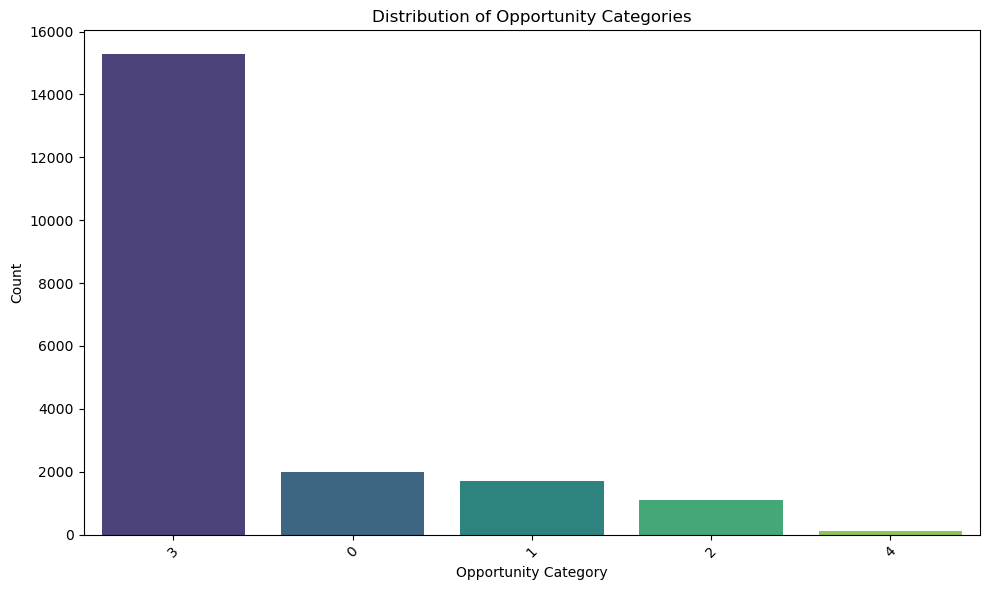

In [160]:
plt.figure(figsize=(10, 6))
sns.countplot(data=oppo_info, x='Opportunity Category', order=oppo_info['Opportunity Category'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Opportunity Categories")
plt.xlabel("Opportunity Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

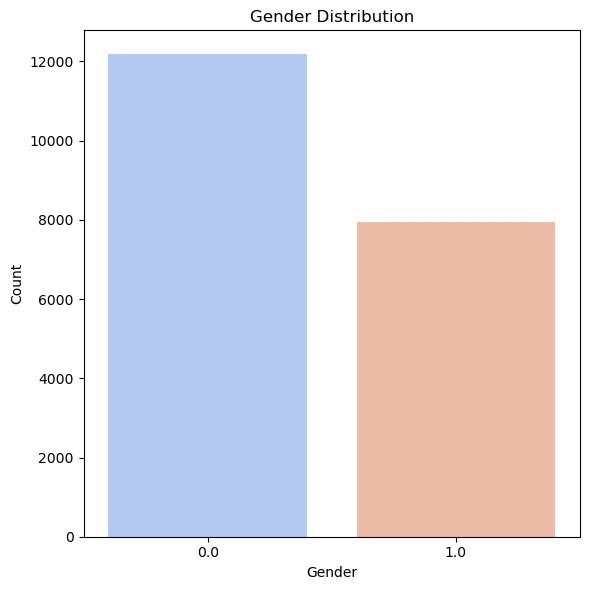

In [162]:
plt.figure(figsize=(6, 6))
sns.countplot(data=oppo_info, x='Gender', palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

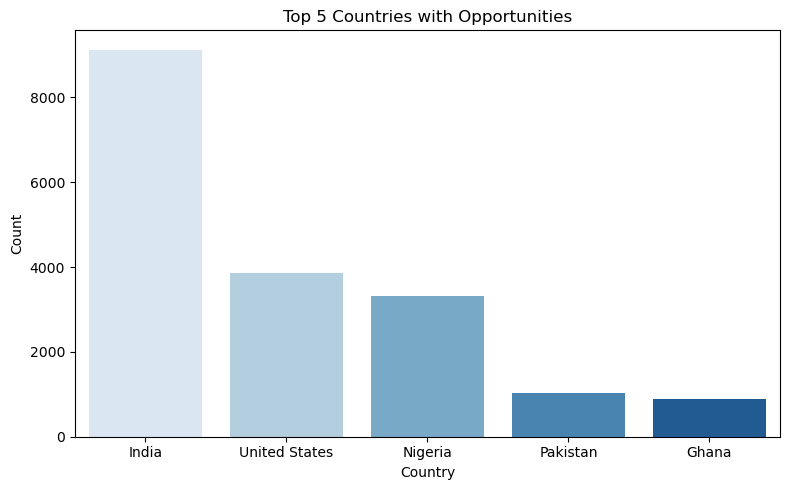

In [164]:
top_countries = oppo_info['Country'].value_counts().nlargest(5).index

plt.figure(figsize=(8, 5))
sns.countplot(data=oppo_info[oppo_info['Country'].isin(top_countries)], x='Country', order=top_countries, palette="Blues")
plt.title("Top 5 Countries with Opportunities")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

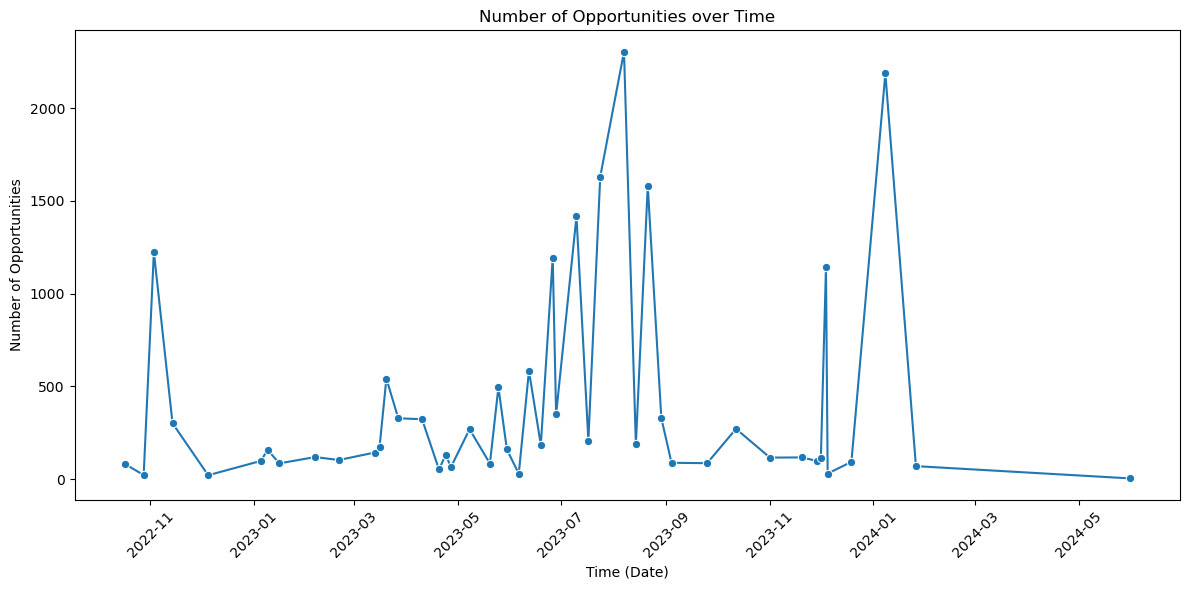

In [166]:
# Convert Opportunity Start Date into datetime format for analysis
oppo_info["Opportunity Start Date"] = pd.to_datetime(oppo_info["Opportunity Start Date"], errors='coerce')

# Group by time
time_series_data = oppo_info['Opportunity Start Date'].dt.date.dropna().value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=time_series_data.index, y=time_series_data.values, marker="o")
plt.xticks(rotation=45)
plt.title("Number of Opportunities over Time")
plt.xlabel("Time (Date)")
plt.ylabel("Number of Opportunities")
plt.tight_layout()
plt.show()

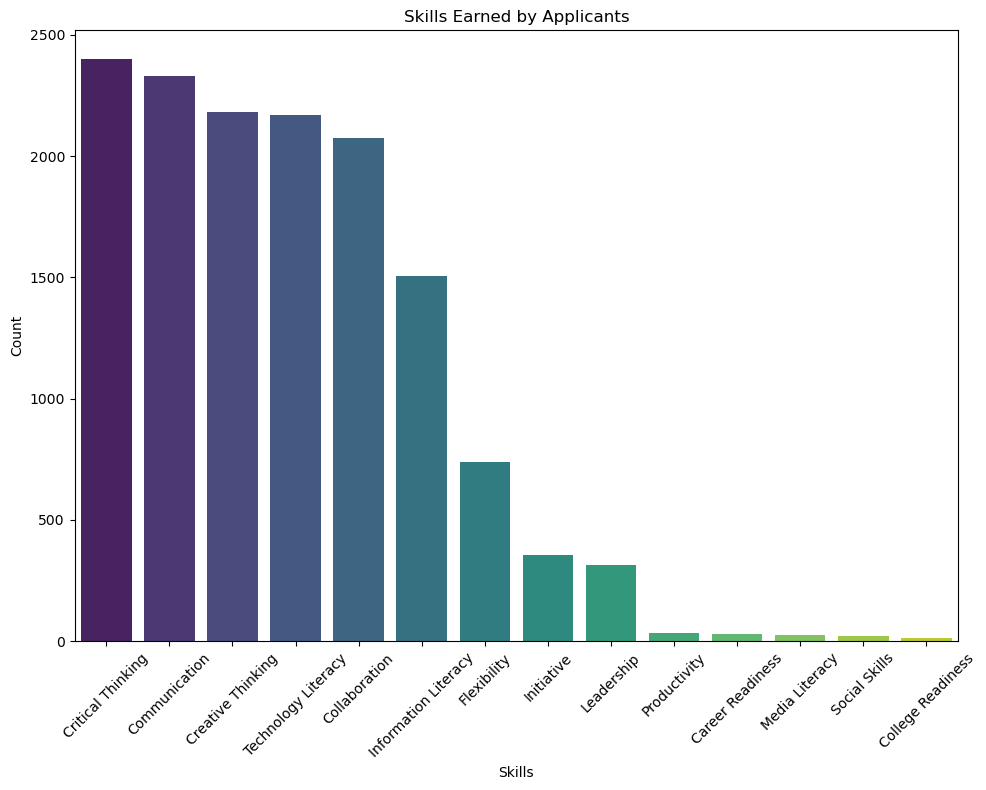

In [170]:
skills_columns = [
    "Critical Thinking", "Creative Thinking", "Initiative", "College Readiness",
    "Collaboration", "Productivity", "Flexibility", "Media Literacy",
    "Social Skills", "Technology Literacy", "Leadership", "Communication",
    "Information Literacy", "Career Readiness"
]

# Create a dataframe of only relevant skill counts
skills_data = oppo_info[skills_columns].dropna(how="all").sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=skills_data.index, y=skills_data.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Skills Earned by Applicants")
plt.xlabel("Skills")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

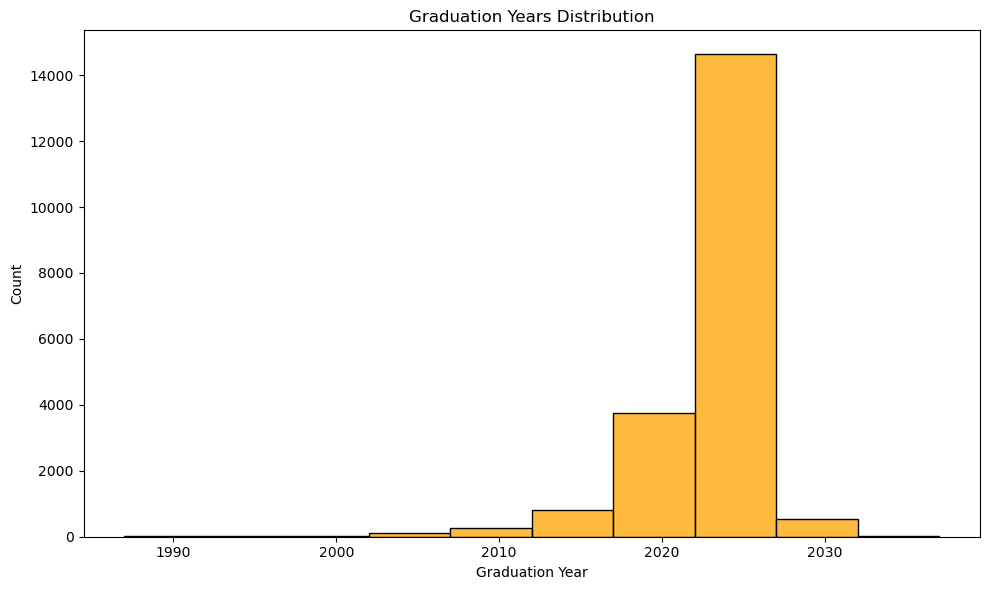

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(oppo_info["Graduation Date(YYYY MM)"].dropna().dt.year, kde=False, bins=10, color="orange")
plt.title("Graduation Years Distribution")
plt.xlabel("Graduation Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

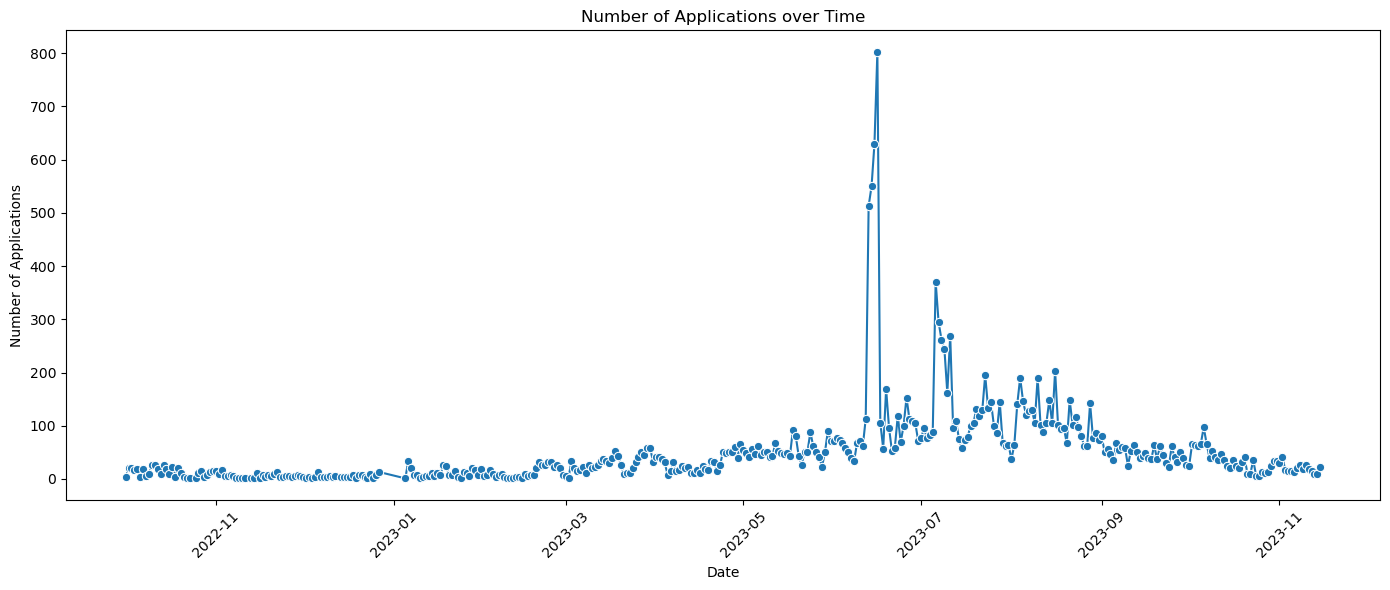

In [174]:
# Convert Application Date into datetime
oppo_info["Apply Date"] = pd.to_datetime(oppo_info["Apply Date"], errors='coerce')

# Group by date and count applications over time
application_time_series = oppo_info["Apply Date"].dropna().dt.date.value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x=application_time_series.index, y=application_time_series.values, marker='o')
plt.xticks(rotation=45)
plt.title("Number of Applications over Time")
plt.xlabel("Date")
plt.ylabel("Number of Applications")
plt.tight_layout()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


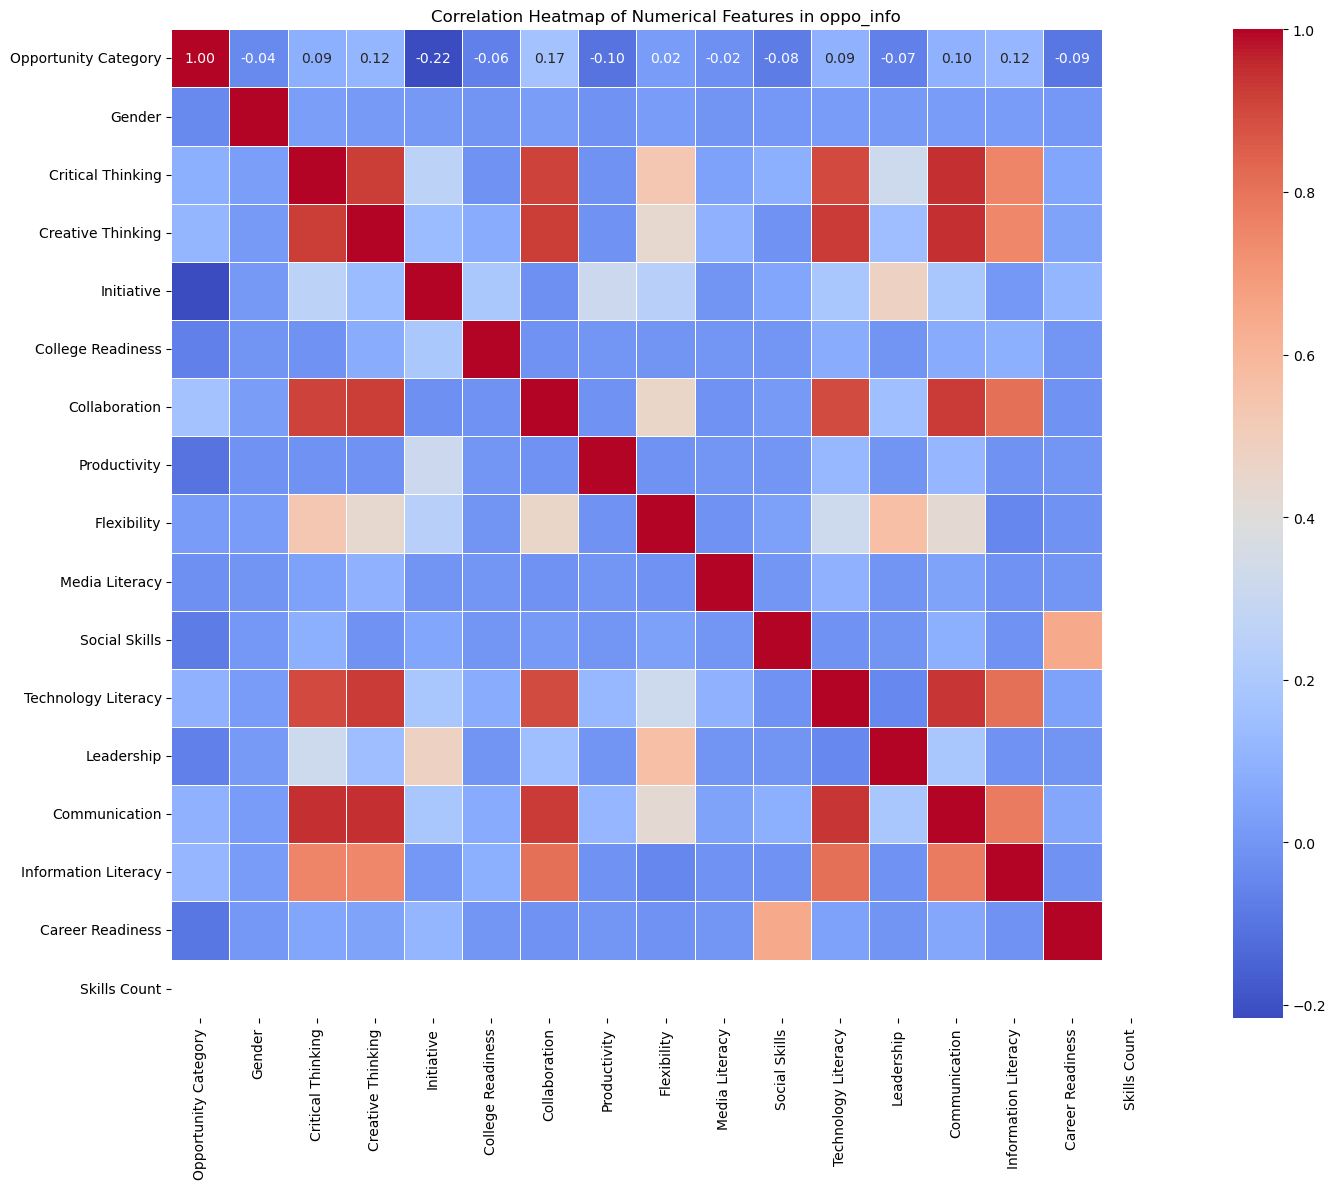

In [182]:
# Select only numerical columns from the DataFrame
numerical_df = oppo_info.select_dtypes(include=['float64', 'int64']).dropna(how='any')  # Selecting only numerical columns

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numerical Features in oppo_info")
plt.tight_layout()
plt.show()

In [186]:
# Save entire DataFrame to CSV
oppo_info.to_csv('opportunity_info.csv', index=False)

# Print confirmation
print("Entire user_data DataFrame has been saved to 'opportunity_info.csv'")

Entire user_data DataFrame has been saved to 'opportunity_info.csv'


In [190]:
oppo_info.describe()

,Opportunity Category,Gender,Skill Points Earned,Critical Thinking,Creative Thinking,Initiative,College Readiness,Collaboration,Productivity,Flexibility,Media Literacy,Social Skills,Technology Literacy,Leadership,Communication,Information Literacy,Career Readiness,Skills Count
count,20191.000000,20119.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.000000,20191.0
mean,2.485018,0.394751,147.439849,0.118766,0.108018,0.017681,0.000693,0.102670,0.001783,0.036650,0.001238,0.001040,0.107424,0.015601,0.115398,0.074588,0.001436,14.0
std,1.010328,0.488809,416.124214,0.323521,0.310411,0.131793,0.026324,0.303534,0.042189,0.187906,0.035167,0.032234,0.309659,0.123929,0.319509,0.262731,0.037872,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.0
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.0
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.0
75%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.0
max,4.000000,1.000000,1776.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.0
